In [1]:
# import library
%matplotlib inline
import rclib.IO as rcIO # make sure the lib is linked to the same directory
import rclib.plot as rcplt
import rclib.Scale as rcscale
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

In [13]:
# data in
[time, block_size, coordinates, bounding, veltot, dens, dena, pres, prsa ] \
= rcIO.test_FLASH_IO( '', 'yahil_hdf5_chk_', 7 ) 

filename = yahil_hdf5_chk_0007
time = 0.006582143825713606  s


In [14]:
# convert data to 1D array
r = rcscale.scale_FLASH_2DCylindrical_Coordinate( coordinates )
r_km = r * 1e-5
dens_1d = rcscale.scale_FLASH_2DCylindrical( dens )
pres_1d = rcscale.scale_FLASH_2DCylindrical( pres )
velt_c_1d = rcscale.scale_FLASH_2DCylindrical( veltot )
velt_c_1d = - velt_c_1d *1e-10 / 3

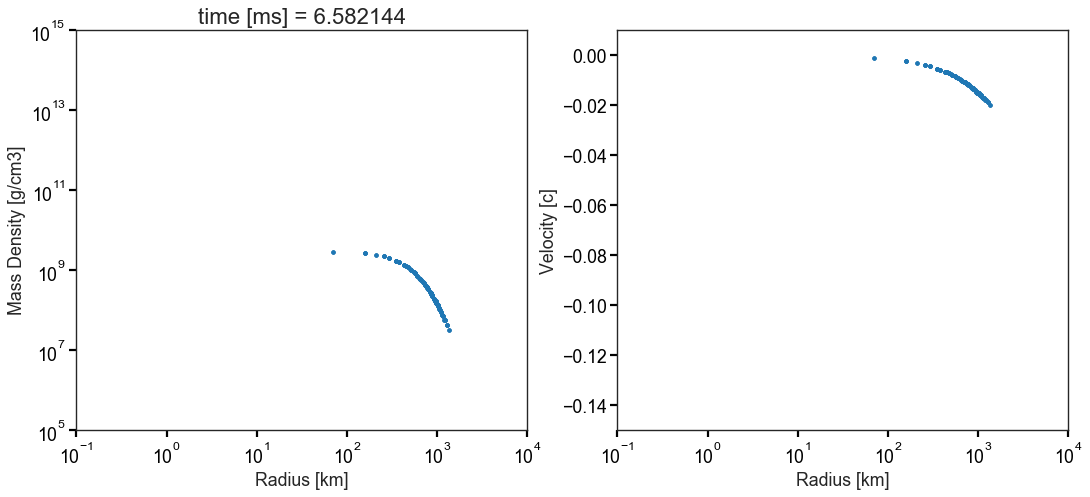

In [18]:
# make plot: dens vs r; pre vs r
fig=plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
ax1 = plt.subplot(121)
plt.loglog(r_km,dens_1d,'.')
plt.xlim((1e-1, 1e4))
plt.ylim((1e5, 1e15))
plt.xlabel('Radius [km]',fontsize=16)
plt.ylabel('Mass Density [g/cm3]',fontsize=16)
ax1.tick_params(direction='out', length=6, width=2, colors='k',
               grid_color='k', grid_alpha=0.5,labelsize = 16)
ax1.set_title('time [ms] = %f'%(time*1e3), fontsize=20)
ax2 = plt.subplot(122)
plt.semilogx(r_km,velt_c_1d,'.')
plt.xlim((1e-1, 1e4))
plt.ylim((-0.15, 0.01))
plt.xlabel('Radius [km]',fontsize=16)
plt.ylabel('Velocity [c]',fontsize=16)
ax2.tick_params(direction='out', length=6, width=2, colors='k',
               grid_color='k', grid_alpha=0.5,labelsize = 16)
plt.subplots_adjust(bottom=0.25, top=0.75)
plt.show()